In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
from keras.models import load_model

Using TensorFlow backend.


In [2]:
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

def compute_accuracy(predictions, labels):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    total_count = 0
    correct_count = 0
    error_count = 0
    for idx, val in enumerate(predictions):
        label = labels[idx][0]
        prediction = predictions[idx][0]
        if label == 1:
            if prediction < 0.5:
                correct_count += 1
            else:
                error_count += 1
        else:
            if prediction > 0.5:
                correct_count += 1
            else:
                error_count += 1
        total_count += 1
    
    return correct_count/total_count
    
#     return labels[predictions.ravel() < 0.5].mean()

model = load_model('signature_model_03_30.h5', custom_objects={'contrastive_loss': contrastive_loss})

In [4]:
# p for person
for p in range(1,31):
    
    te_pairs = []
    te_y = []
    
    # l for left
    for l in range(1, 31):
        for r in range(1, 31):
            # testing
            te_left = '{:02d}/{:02d}{:02d}.tif'.format(p, 2, l)
            te_same = '{:02d}/{:02d}{:02d}.tif'.format(p, 2, r)
            te_diff = '{:02d}/{:02d}{:02d}.tif'.format(r, 4, p)
#             print('{},{}'.format(te_left, te_same))
#             print('{},{}'.format(te_left, te_diff))
            
            te_im_left = cv2.imread(te_left, 0)
            te_im_left = cv2.resize(te_im_left,(358,174),interpolation=cv2.INTER_CUBIC)
            te_im_left = te_im_left/255
            
            te_im_same = cv2.imread(te_same, 0)
            te_im_same = cv2.resize(te_im_same,(358,174),interpolation=cv2.INTER_CUBIC)
            te_im_same = te_im_same/255
            
#             te_im_diff = cv2.imread(te_diff, 0)
#             te_im_diff = cv2.resize(te_im_diff,(358,174),interpolation=cv2.INTER_CUBIC)
#             te_im_diff = te_im_diff/255
            
            te_pairs += [te_im_left, te_im_same]
            te_y += [1]
            
#             te_pairs += [te_im_left, te_im_diff]
#             te_y += [0]
            
    

    
    te_pairs = np.array(te_pairs)
    te_pairs = te_pairs.reshape(int(te_pairs.shape[0]/2), 2, 174, 358, 1)
    te_y = np.array(te_y)
    te_y = te_y.reshape(te_y.shape[0], 1)
    
    # print shape of data
    print(p)

    print('te_pairs.shape:{}'.format(te_pairs.shape))
    print('te_y.shape:{}'.format(te_y.shape))
    
    
    # predict
    pred = model.predict([te_pairs[:, 0], te_pairs[:, 1]])
    te_acc = compute_accuracy(pred, te_y)
    print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))
    
    print(time.strftime("%Y-%m-%d %H:%M:%S"))
    


1
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 42.22%
2017-10-24 09:29:58
2
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 34.00%
2017-10-24 09:30:30
3
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 91.78%
2017-10-24 09:31:03
4
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 57.33%
2017-10-24 09:31:35
5
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 96.89%
2017-10-24 09:32:07
6
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 55.56%
2017-10-24 09:32:39
7
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 45.11%
2017-10-24 09:33:11
8
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 100.00%
2017-10-24 09:33:42
9
te_pairs.shape:(900, 2, 174, 358, 1)
te_y.shape:(900, 1)
* Accuracy on test set: 96.00%
2017-10-24 09:34:14
10
te_pai

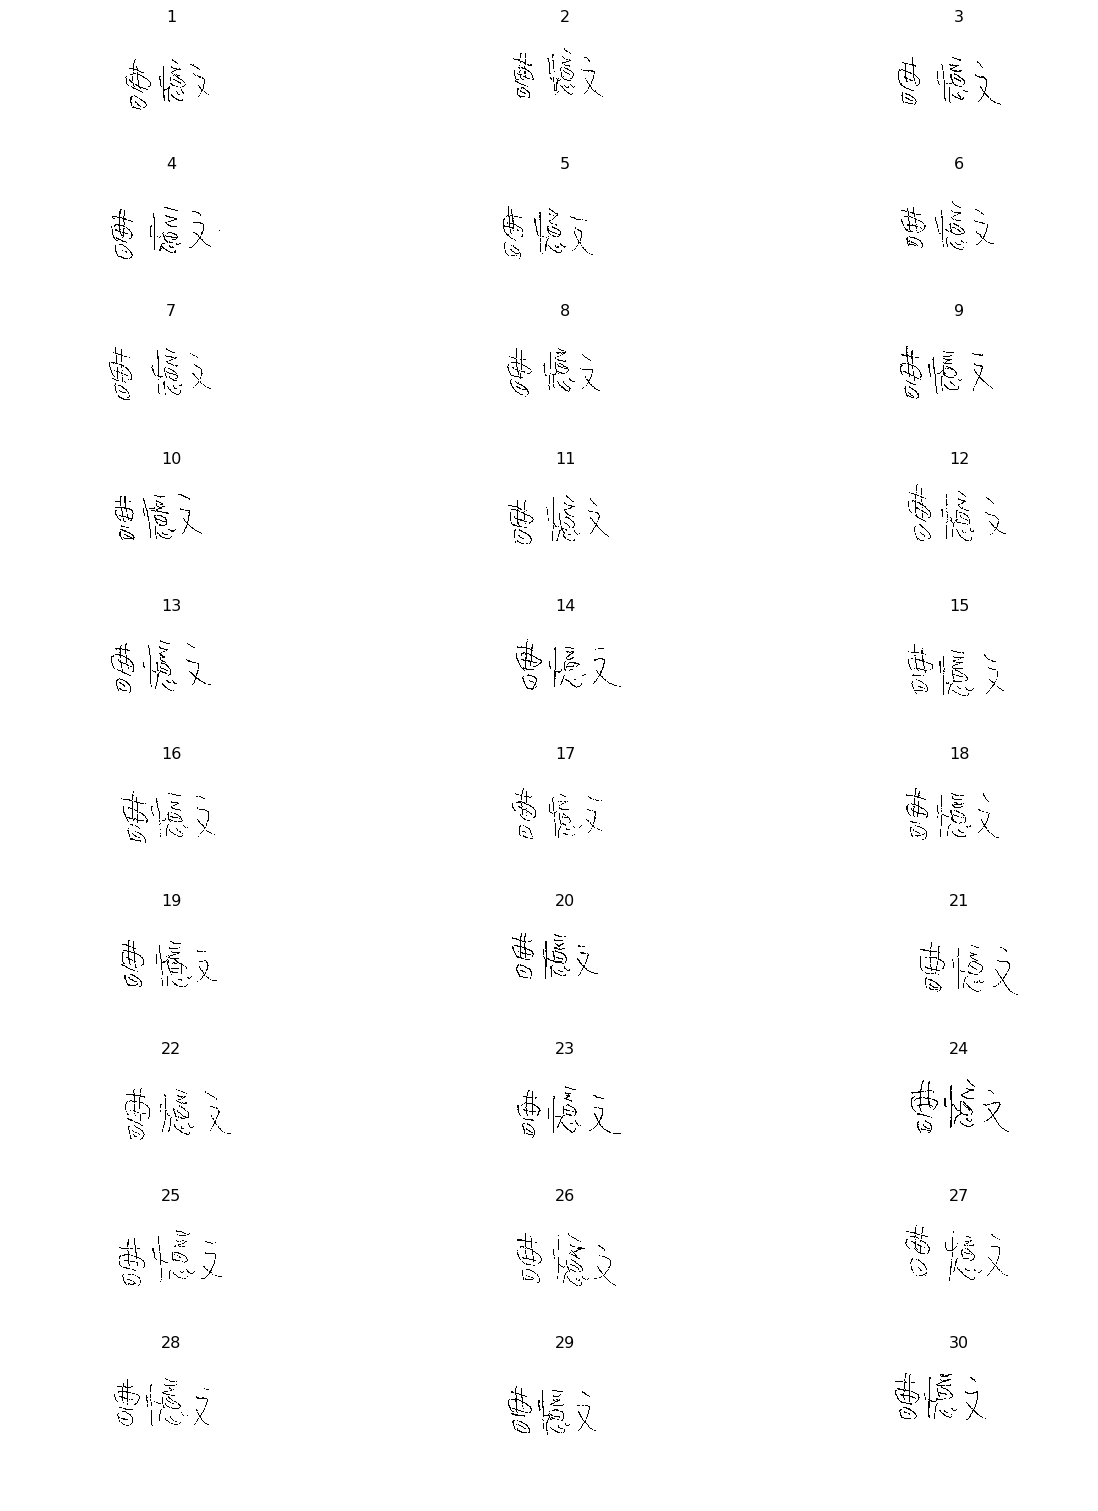

In [12]:
p = 8
fig=plt.figure(figsize=(15, 20), dpi= 96, facecolor='w', edgecolor='k')
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.title(i+1)
    file = '{:02d}/02{:02d}.tif'.format(p, i+1)
    plt.imshow(cv2.imread(file, 0), cmap='gray')
    plt.axis('off')

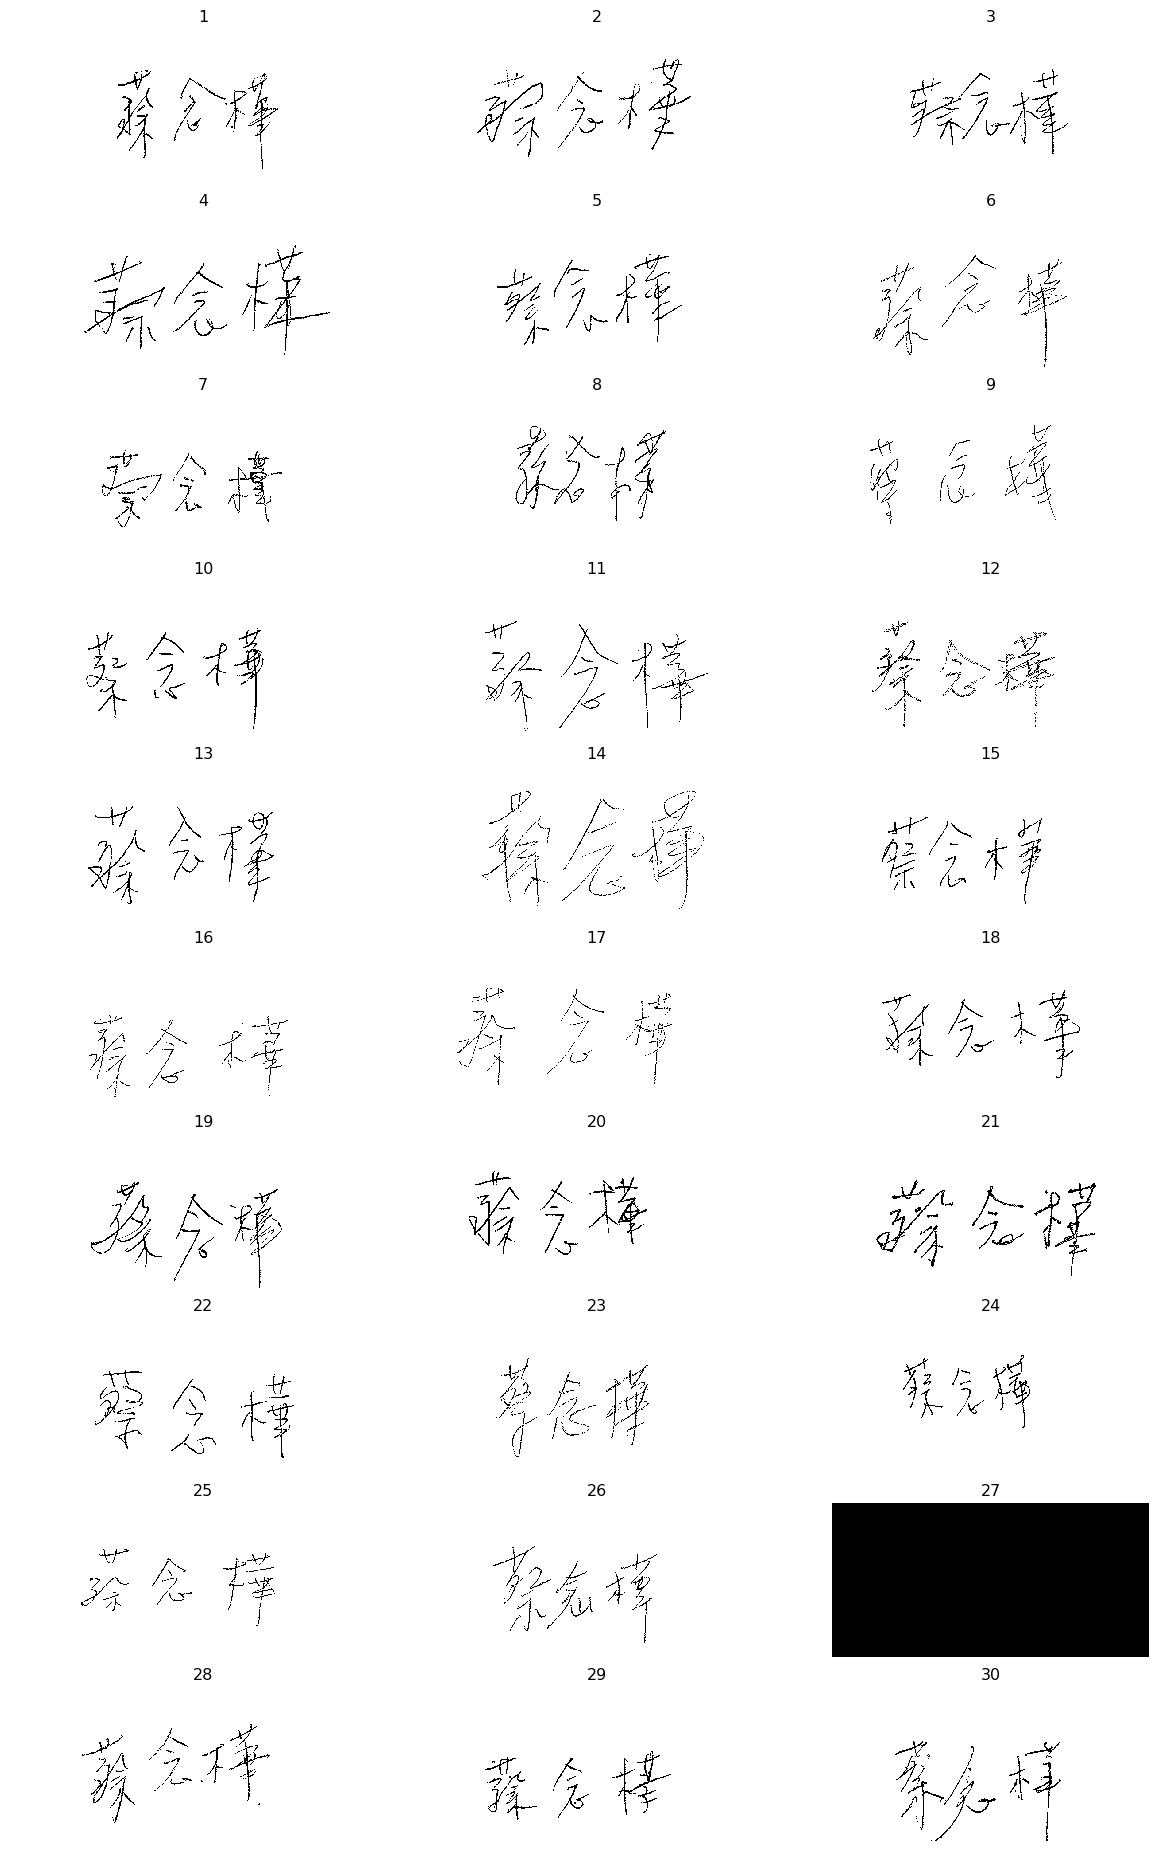

In [6]:
p = 27
fig=plt.figure(figsize=(15, 25), dpi= 96, facecolor='w', edgecolor='k')
# plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.title(i+1)
    file = '{:02d}/04{:02d}.tif'.format(i+1, p)
    plt.imshow(cv2.imread(file, 0), cmap='gray')
    plt.axis('off')
    